In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Europe/Moscow"
next_day_starts_at = 5
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
from anki.collection import Collection


optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract("./Main_27.04.2023.apkg",
                       filter_out_suspended_cards, filter_out_flags)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False)

col = Collection("./collection.anki21")
decks = [item.name for item in tuple(col.decks.all_names_and_ids()) if sum([col.get_card(cid).reps for cid in col.find_cards(f"deck:{item.name}")]) >= 1000]

def remove_substrings(lst):
    # Sort the list by length of the strings, longest first
    lst.sort(key=len, reverse=True)

    # List to hold the filtered items
    filtered_list = []

    for item in lst:
        # Add the item to the filtered list if it is not a substring of any item already in the filtered list
        if not any(item in other_item for other_item in filtered_list):
            filtered_list.append(item)

    return filtered_list

decks_for_cluster = remove_substrings(decks)
df = pd.read_csv("./revlog_history.tsv", sep="\t")
dfs = [(name, df[df['card_id'].isin(tuple(col.find_cards(f"deck:{name}")))].copy(
)) for name in decks_for_cluster]

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/30507 [00:00<?, ?it/s]

Trainset saved.


In [3]:
ws = []
datasets = []

for name, df in dfs:
    optimizer.define_model()
    S0_dataset = df[df["i"] == 2].copy()
    optimizer.S0_dataset_group = (
        S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    optimizer.pretrain(df.copy(), verbose=False)
    optimizer.train(verbose=False)
    datasets.append(optimizer.dataset.copy())
    ws.append(optimizer.w)

Pretrain finished!


  0%|          | 0/30835 [00:00<?, ?it/s]

Tensorized!
TRAIN: 23621 TEST: 7214
dataset built


train:   0%|          | 0/110300 [00:00<?, ?it/s]

TRAIN: 24168 TEST: 6667
dataset built


train:   0%|          | 0/110185 [00:00<?, ?it/s]

TRAIN: 24848 TEST: 5987
dataset built


train:   0%|          | 0/106705 [00:00<?, ?it/s]

TRAIN: 25420 TEST: 5415
dataset built


train:   0%|          | 0/109580 [00:00<?, ?it/s]

TRAIN: 25283 TEST: 5552
dataset built


train:   0%|          | 0/109790 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/959 [00:00<?, ?it/s]

Tensorized!
TRAIN: 698 TEST: 261
dataset built


train:   0%|          | 0/3245 [00:00<?, ?it/s]

TRAIN: 771 TEST: 188
dataset built


train:   0%|          | 0/2995 [00:00<?, ?it/s]

TRAIN: 770 TEST: 189
dataset built


train:   0%|          | 0/3210 [00:00<?, ?it/s]

TRAIN: 800 TEST: 159
dataset built


train:   0%|          | 0/3140 [00:00<?, ?it/s]

TRAIN: 797 TEST: 162
dataset built


train:   0%|          | 0/3150 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/22598 [00:00<?, ?it/s]

Tensorized!
TRAIN: 18302 TEST: 4296
dataset built


train:   0%|          | 0/83335 [00:00<?, ?it/s]

TRAIN: 18318 TEST: 4280
dataset built


train:   0%|          | 0/83910 [00:00<?, ?it/s]

TRAIN: 18391 TEST: 4207
dataset built


train:   0%|          | 0/83850 [00:00<?, ?it/s]

TRAIN: 17695 TEST: 4903
dataset built


train:   0%|          | 0/84040 [00:00<?, ?it/s]

TRAIN: 17686 TEST: 4912
dataset built


train:   0%|          | 0/84125 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/1342 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1073 TEST: 269
dataset built


train:   0%|          | 0/5250 [00:00<?, ?it/s]

TRAIN: 1073 TEST: 269
dataset built


train:   0%|          | 0/5175 [00:00<?, ?it/s]

TRAIN: 1074 TEST: 268
dataset built


train:   0%|          | 0/5075 [00:00<?, ?it/s]

TRAIN: 1074 TEST: 268
dataset built


train:   0%|          | 0/5070 [00:00<?, ?it/s]

TRAIN: 1074 TEST: 268
dataset built


train:   0%|          | 0/5070 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/5864 [00:00<?, ?it/s]

Tensorized!
TRAIN: 4514 TEST: 1350
dataset built


train:   0%|          | 0/21075 [00:00<?, ?it/s]

TRAIN: 4786 TEST: 1078
dataset built


train:   0%|          | 0/20715 [00:00<?, ?it/s]

TRAIN: 4624 TEST: 1240
dataset built


train:   0%|          | 0/20975 [00:00<?, ?it/s]

TRAIN: 4743 TEST: 1121
dataset built


train:   0%|          | 0/20910 [00:00<?, ?it/s]

TRAIN: 4789 TEST: 1075
dataset built


train:   0%|          | 0/20725 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/1287 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1028 TEST: 259
dataset built


train:   0%|          | 0/5040 [00:00<?, ?it/s]

TRAIN: 1028 TEST: 259
dataset built


train:   0%|          | 0/5010 [00:00<?, ?it/s]

TRAIN: 1031 TEST: 256
dataset built


train:   0%|          | 0/4935 [00:00<?, ?it/s]

TRAIN: 1030 TEST: 257
dataset built


train:   0%|          | 0/4925 [00:00<?, ?it/s]

TRAIN: 1031 TEST: 256
dataset built


train:   0%|          | 0/4930 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/15204 [00:00<?, ?it/s]

Tensorized!
TRAIN: 10684 TEST: 4520
dataset built


train:   0%|          | 0/44290 [00:00<?, ?it/s]

TRAIN: 11512 TEST: 3692
dataset built


train:   0%|          | 0/44260 [00:00<?, ?it/s]

TRAIN: 12980 TEST: 2224
dataset built


train:   0%|          | 0/44170 [00:00<?, ?it/s]

TRAIN: 12981 TEST: 2223
dataset built


train:   0%|          | 0/44200 [00:00<?, ?it/s]

TRAIN: 12659 TEST: 2545
dataset built


train:   0%|          | 0/44240 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/2292 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1833 TEST: 459
dataset built


train:   0%|          | 0/9040 [00:00<?, ?it/s]

TRAIN: 1834 TEST: 458
dataset built


train:   0%|          | 0/8925 [00:00<?, ?it/s]

TRAIN: 1834 TEST: 458
dataset built


train:   0%|          | 0/8820 [00:00<?, ?it/s]

TRAIN: 1833 TEST: 459
dataset built


train:   0%|          | 0/8820 [00:00<?, ?it/s]

TRAIN: 1834 TEST: 458
dataset built


train:   0%|          | 0/8815 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/52207 [00:00<?, ?it/s]

Tensorized!
TRAIN: 40673 TEST: 11534
dataset built


train:   0%|          | 0/170590 [00:00<?, ?it/s]

TRAIN: 43259 TEST: 8948
dataset built


train:   0%|          | 0/167570 [00:00<?, ?it/s]

TRAIN: 42007 TEST: 10200
dataset built


train:   0%|          | 0/170455 [00:00<?, ?it/s]

TRAIN: 43779 TEST: 8428
dataset built


train:   0%|          | 0/170195 [00:00<?, ?it/s]

TRAIN: 39110 TEST: 13097
dataset built


train:   0%|          | 0/170430 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/4587 [00:00<?, ?it/s]

Tensorized!
TRAIN: 3547 TEST: 1040
dataset built


train:   0%|          | 0/17345 [00:00<?, ?it/s]

TRAIN: 3696 TEST: 891
dataset built


train:   0%|          | 0/16890 [00:00<?, ?it/s]

TRAIN: 3692 TEST: 895
dataset built


train:   0%|          | 0/17215 [00:00<?, ?it/s]

TRAIN: 3706 TEST: 881
dataset built


train:   0%|          | 0/16985 [00:00<?, ?it/s]

TRAIN: 3707 TEST: 880
dataset built


train:   0%|          | 0/16945 [00:00<?, ?it/s]


Training finished!


0.35577404246014055
R-squared: 0.8918
RMSE: 0.0316
MAE: 0.0176
ICI: 0.0176
E50: 0.0115
E90: 0.0367
EMax: 0.3086
[0.20118675 0.76998564]

Last rating: 1
R-squared: 0.6377
RMSE: 0.0616
MAE: 0.0532
ICI: 0.0510
E50: 0.0512
E90: 0.0889
EMax: 0.2034
[0.29296643 0.63585109]

Last rating: 2
R-squared: 0.9161
RMSE: 0.0289
MAE: 0.0221
ICI: 0.0202
E50: 0.0229
E90: 0.0265
EMax: 0.2216
[0.13377753 0.82764059]

Last rating: 3
R-squared: 0.8376
RMSE: 0.0354
MAE: 0.0148
ICI: 0.0136
E50: 0.0040
E90: 0.0372
EMax: 0.3347
[0.23208837 0.74533874]

Last rating: 4
R-squared: -0.1577
RMSE: 0.0300
MAE: 0.0195
ICI: 0.0195
E50: 0.0119
E90: 0.0349
EMax: 0.1832
[0.43698682 0.56465592]


({'R-squared': 0.8917673081542083,
  'RMSE': 0.031606722397252464,
  'MAE': 0.017585431459214526,
  'ICI': 0.017630405825414926},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

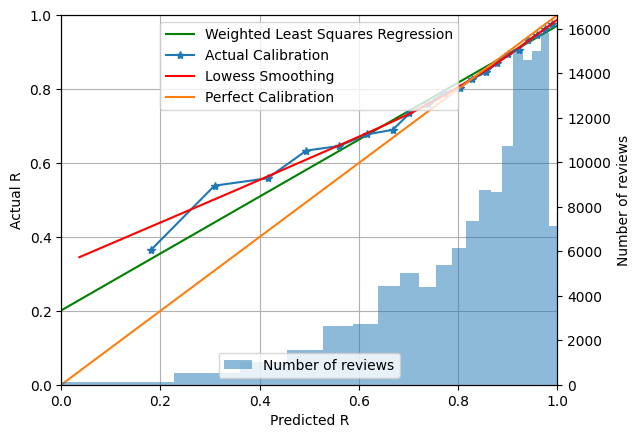

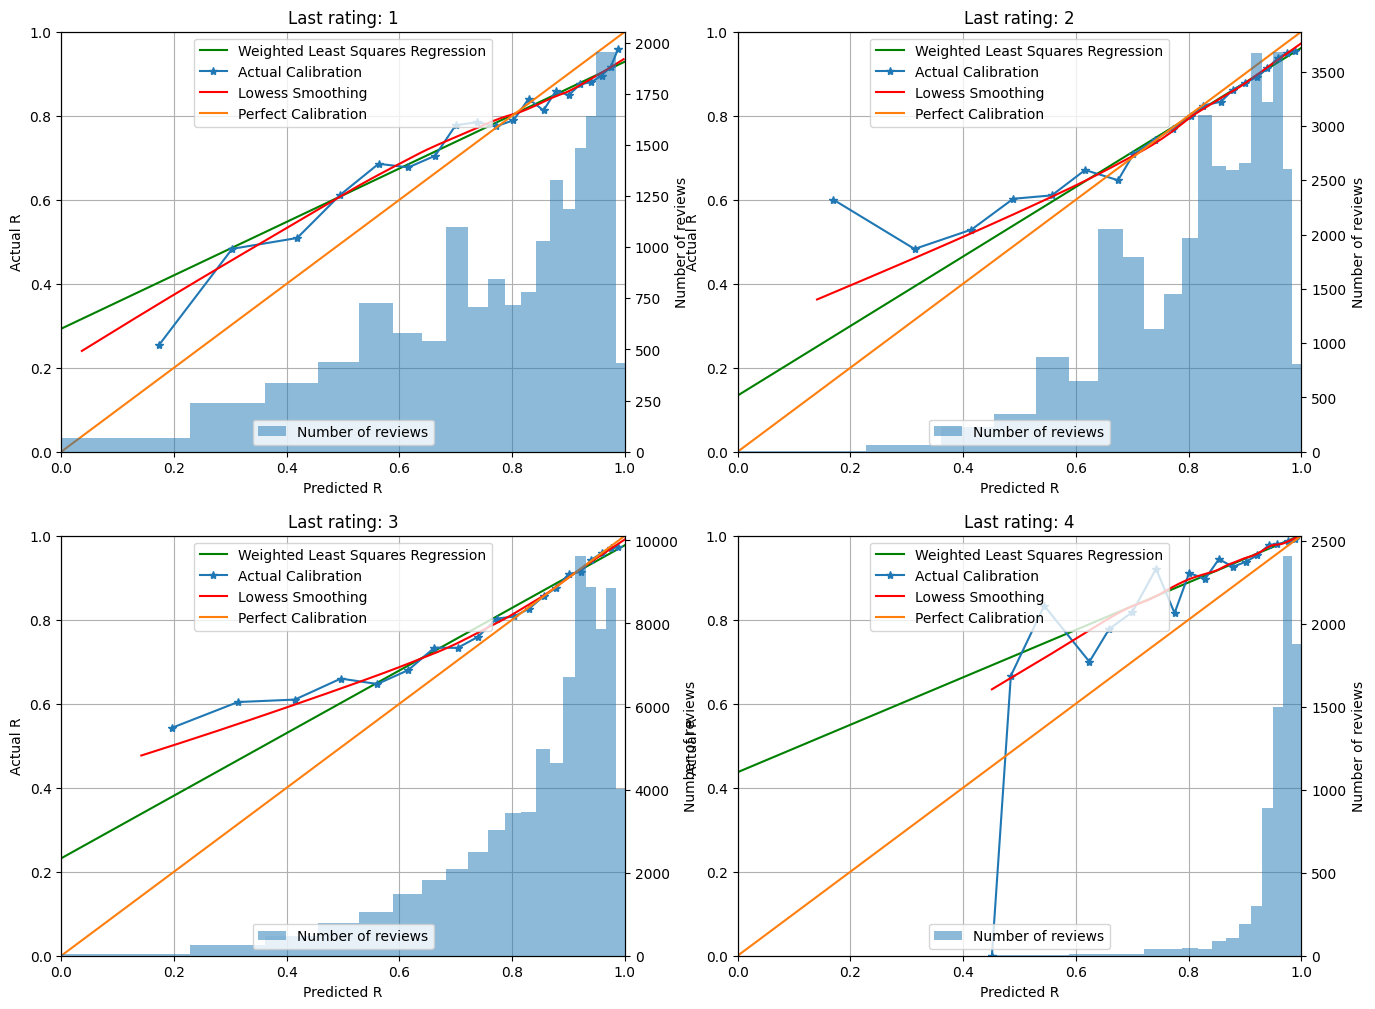

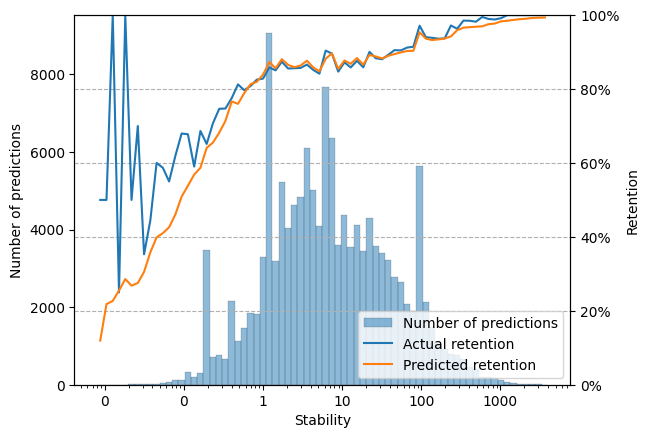

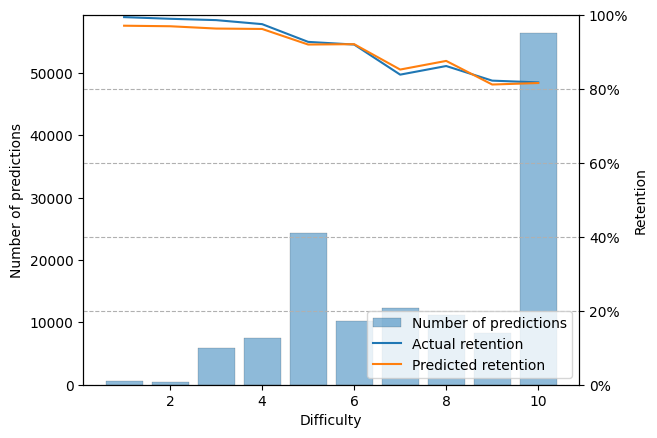

In [4]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

results = []

for w, dataset in zip(ws, datasets):
    my_collection = Collection(w)
    stabilities, difficulties = my_collection.batch_predict(dataset)
    dataset["stability"] = stabilities
    dataset["difficulty"] = difficulties
    dataset["p"] = power_forgetting_curve(dataset["delta_t"], dataset["stability"])
    results.append(dataset.copy())

dataset_join = pd.concat(results, ignore_index=True)
print(log_loss(dataset_join["y"], dataset_join["p"]))
optimizer.calibration_graph(dataset_join)

Pretrain finished!


  0%|          | 0/137175 [00:00<?, ?it/s]

Tensorized!
TRAIN: 110792 TEST: 26383
dataset built


train:   0%|          | 0/505130 [00:00<?, ?it/s]

TRAIN: 110792 TEST: 26383
dataset built


train:   0%|          | 0/480630 [00:00<?, ?it/s]

TRAIN: 110793 TEST: 26382
dataset built


train:   0%|          | 0/452250 [00:00<?, ?it/s]

TRAIN: 108161 TEST: 29014
dataset built


train:   0%|          | 0/459390 [00:00<?, ?it/s]

TRAIN: 108162 TEST: 29013
dataset built


train:   0%|          | 0/439240 [00:00<?, ?it/s]


Training finished!
(0.36963105448237765, 0.36636084620841025)
R-squared: 0.7981
RMSE: 0.0383
MAE: 0.0242
ICI: 0.0232
E50: 0.0161
E90: 0.0444
EMax: 0.3345
[0.25578159 0.70513802]

Last rating: 1
R-squared: 0.5922
RMSE: 0.0575
MAE: 0.0500
ICI: 0.0496
E50: 0.0480
E90: 0.0753
EMax: 0.2075
[0.30545022 0.61884693]

Last rating: 2
R-squared: 0.7406
RMSE: 0.0421
MAE: 0.0357
ICI: 0.0328
E50: 0.0292
E90: 0.0400
EMax: 0.3200
[0.21728125 0.72521997]

Last rating: 3
R-squared: 0.7158
RMSE: 0.0421
MAE: 0.0218
ICI: 0.0211
E50: 0.0126
E90: 0.0488
EMax: 0.3419
[0.29840061 0.66877148]

Last rating: 4
R-squared: -0.6403
RMSE: 0.0351
MAE: 0.0170
ICI: 0.0176
E50: 0.0080
E90: 0.0358
EMax: 0.1721
[0.54683077 0.44877956]


({'R-squared': 0.7981323276340612,
  'RMSE': 0.03828107475946618,
  'MAE': 0.024249023640719358,
  'ICI': 0.023224342173735375},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

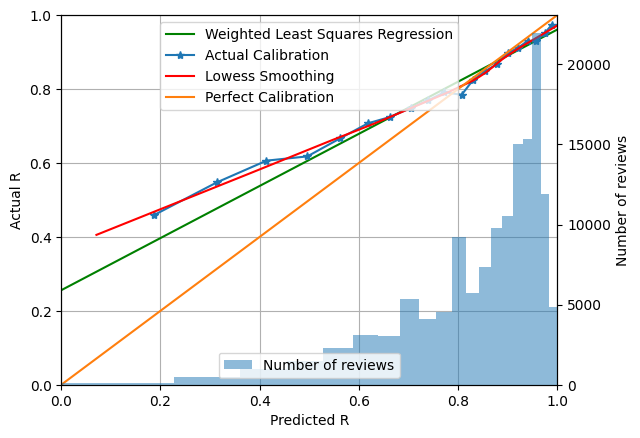

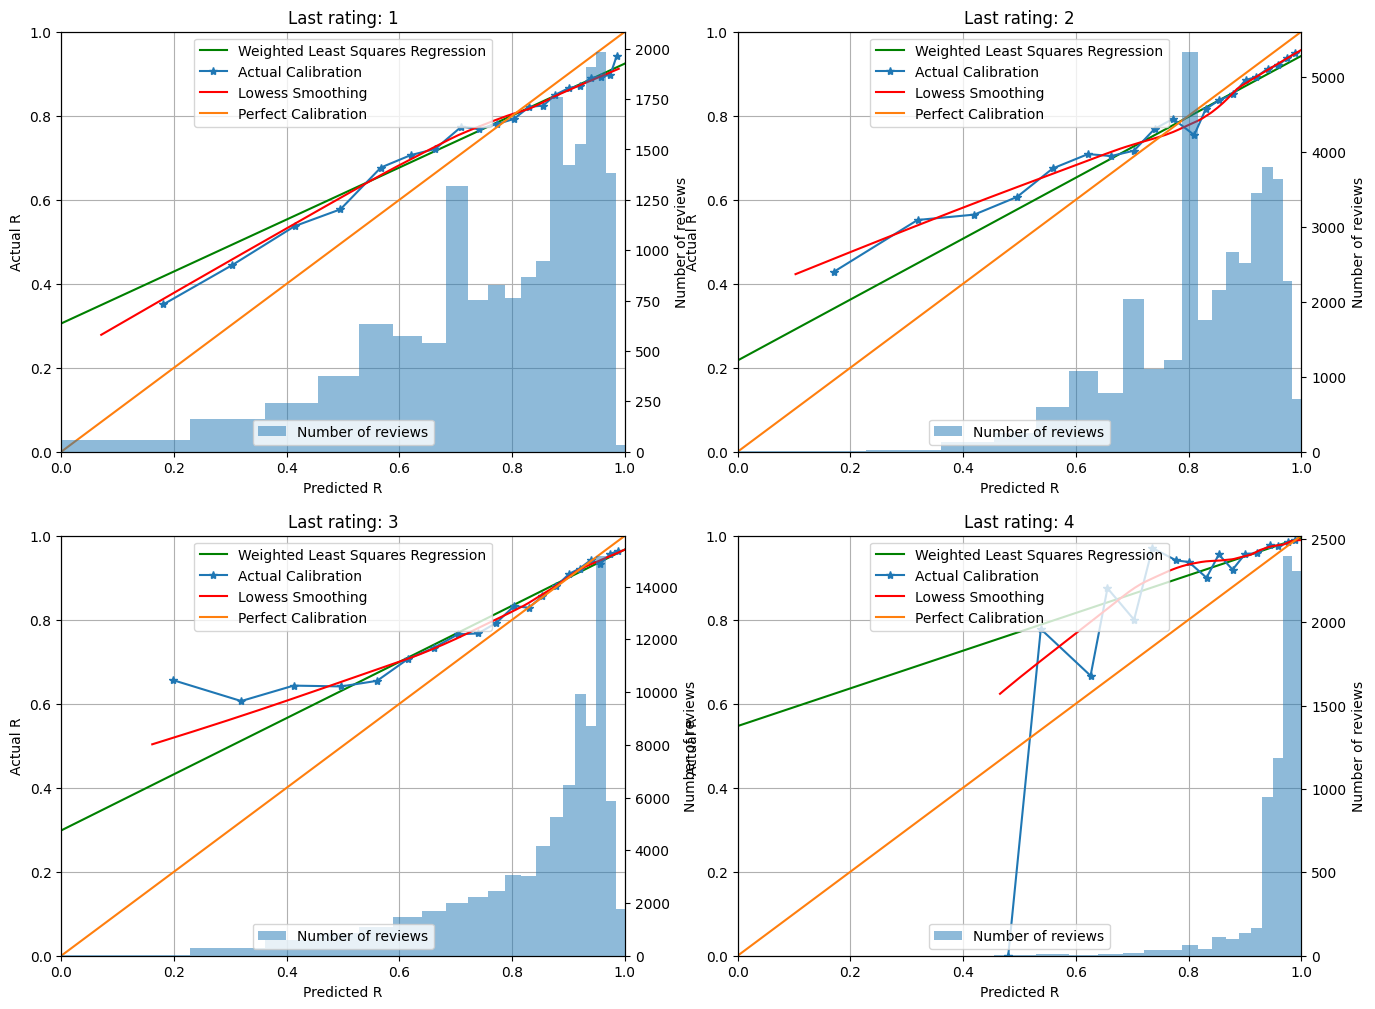

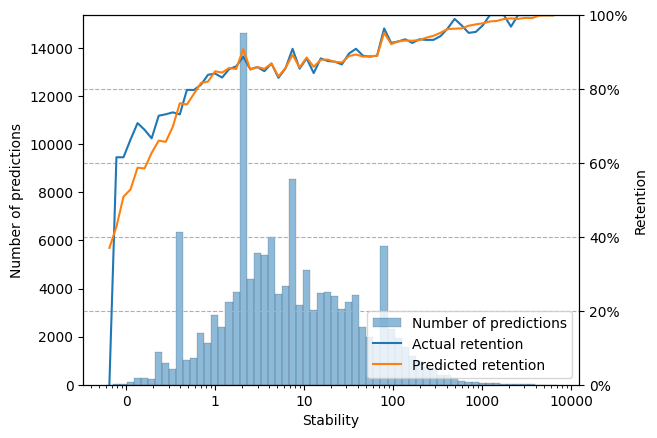

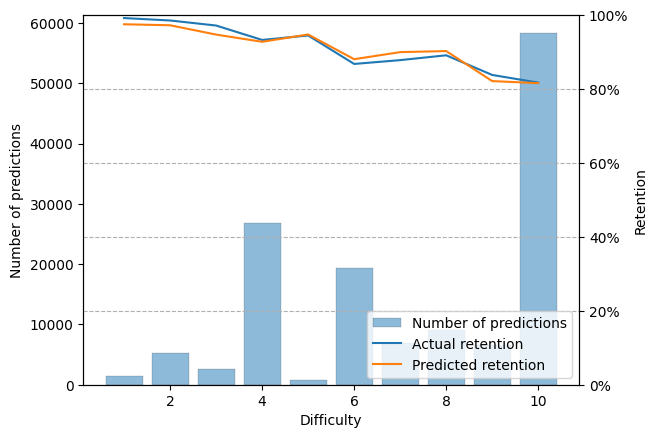

In [5]:
optimizer.define_model()
S0_dataset = dataset_join[dataset_join["i"] == 2].copy()
optimizer.S0_dataset_group = (
    S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
    .agg({"y": ["mean", "count"]})
    .reset_index()
)
optimizer.pretrain(dataset_join.copy(), verbose=False)
optimizer.train(verbose=False)
print(optimizer.evaluate())
optimizer.calibration_graph()

In [6]:
for w, (name, _) in zip(ws, dfs):
    print(name, w, sep="\n")

print("Global", optimizer.w, sep="\n")

Main::Japanese::WaniKani::Vocabulary
[0.4687, 0.4687, 1.8448, 17.8, 5.2376, 2.1317, 0.9607, 0.0149, 1.8897, 0.1822, 1.2913, 2.2167, 0.038, 0.2463, 1.1736, 0.1619, 3.6438]
Main::Programming::Python::Syntax
[0.6723, 0.7773, 0.9663, 7.9731, 5.0648, 1.2414, 0.9747, 0.0, 1.6639, 0.1544, 1.0384, 2.1394, 0.0863, 0.3197, 1.2382, 0.2053, 2.9115]
Main::Japanese::WaniKani::Kanji
[0.2228, 0.2228, 1.0005, 11.9264, 5.6278, 2.0568, 1.023, 0.0655, 1.7117, 0.2412, 1.126, 2.2718, 0.0138, 0.1695, 1.4707, 0.1889, 3.698]
Main::Science::Mechanisms
[0.565, 1.2546, 4.1511, 4.1511, 5.2291, 1.0071, 0.9011, 0.0136, 1.5524, 0.2437, 0.9317, 2.1026, 0.1035, 0.2961, 1.3684, 0.1365, 2.5958]
Main::Science::Chemistry
[0.6827, 0.8368, 2.3173, 24.6985, 4.7074, 1.1221, 0.9695, 0.0, 1.8135, 0.1, 1.1689, 2.0427, 0.1443, 0.277, 1.2522, 0.2398, 3.2664]
Main::Geography::Россия
[0.0295, 0.1014, 0.6455, 7.9731, 5.2739, 1.2711, 0.9555, 0.0, 1.4349, 0.2261, 0.8073, 2.0235, 0.187, 0.2182, 1.2549, 0.056, 2.7854]
Main::Japanese::Anim